# Style Transfer for the Masses with Turi Create and Google Colab

In [34]:
from datetime import datetime
timestamp = datetime.now().strftime("%Y_%m_%d_%H%M%S")
print("Date: ", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Date:  2018-08-29 15:29:59


Useful Tutorials:



*  [Google Colaboratory: A Poor Man’s GPU](https://medium.com/i-a/google-colaboratory-a-poor-mans-gpu-ec823a6f6b3)
*   [Google Colab Free GPU Tutorial](https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d)
*   [Turi Create Style Transfer](https://apple.github.io/turicreate/docs/userguide/style_transfer/)






In [0]:
import matplotlib
import matplotlib.pyplot as plt
# this allows plots to appear directly in the notebook
%matplotlib inline

In [36]:
# Installing a beta version of TuriCreate with Style Transfer support.  
# https://github.com/apple/turicreate#version-50-beta
!pip install --upgrade pip
!pip install turicreate==5.0b3
!pip install mxnet-cu80==1.1.0

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (18.0)


Next code block will mount your google drive. This will help you to access files stored in your google drive. 
Druing installation you see a prompt with a link. 
Click the link. Copy and paste the code from the link in the form field and press enter. 
Sometime You may have to run this code block twice.

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [7]:
import os
os.chdir('drive')
!pwd

/content/drive


Make a folder **drive/app** in your Google Drive and put there all files from [this repo](https://github.com/glebsteron/colab-turi-style-transfer-coreml).

In [0]:
os.chdir('drive/app')
!pwd

In [0]:
!ls

In [10]:
import turicreate as tc
print(tc.__version__)

5.0b3


In [12]:
Niterations = 8000
print("Number of iterations: %s\n" % Niterations)
# 100 iterations will give just a standard filter like.
# 2000 iterations is probably enough for quick look 
# 5000 is so much cleaner (less noise), but overall look is similar

Number of iterations: 8000



In [23]:
# Load the style and content images
styles = tc.load_images('style/')
Nstyles = len(styles['image'])
print("Number of Styles: %s\n" % Nstyles)

Number of Styles: 5



Style 0:  style/Yellow-Red-Blue.jpeg


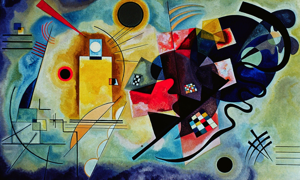

Style 1:  style/girls.jpg


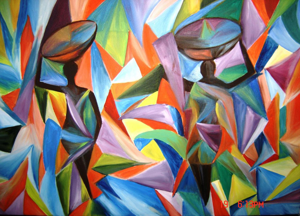

Style 2:  style/kandinsky.jpg


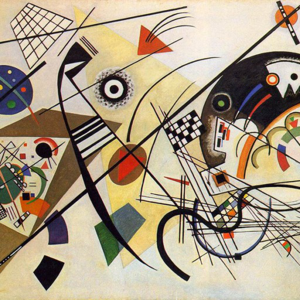

Style 3:  style/style20.jpg


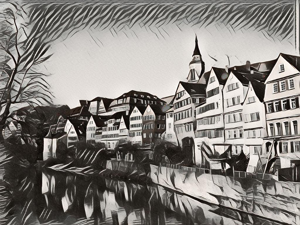

Style 4:  style/young.jpg


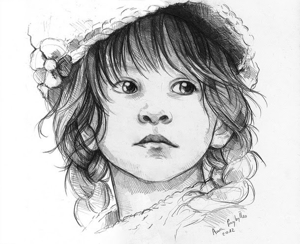

In [24]:
import PIL
from IPython.display import display, Image
for i,r in enumerate(list(styles['image'])):
    image = PIL.Image.fromarray(r.pixel_data)
    image.thumbnail((300,300))
    print("Style " + str(i) + ": ",styles['path'][i])
    display(image)

In [0]:
# number of content images should be more than default batch_size (which is 6 currently).
# please use more content images (around 100-200) during training

content = tc.load_images('content/')

In [27]:
model = tc.style_transfer.create(styles, content, max_iterations=Niterations)
# Save the model for later use in Turi Create
timestamp = datetime.now().strftime("%Y_%m_%d_%H%M%S")
save_folder = 'output/output_' + timestamp
os.mkdir(save_folder)
save_name = "/model_" + str(Nstyles) +"styles_" + str(Niterations) + "iter_"+ timestamp
model.save(save_folder + save_name + '.model')
# Export to Core ML
model.export_coreml(save_folder + save_name + '.mlmodel')

Using 'image' in style_dataset as feature column and using 'image' in content_dataset as feature column
Download completed: /var/tmp/model_cache/resnet-16.params
Download completed: /var/tmp/model_cache/vgg16-conv1_1-4_3.params
Using GPU to create model (CUDA)
Analyzing visual features of the style images
+--------------+--------------+--------------+
| Iteration    | Loss         | Elapsed Time |
+--------------+--------------+--------------+
| 1            | 25.786       | 22.8         |
| 10           | 31.192       | 33.0         |
| 19           | 34.375       | 43.2         |
| 28           | 36.520       | 53.3         |
| 37           | 62.361       | 63.5         |
| 46           | 46.081       | 73.7         |
| 55           | 34.360       | 83.8         |
| 64           | 44.827       | 93.9         |
| 73           | 38.174       | 104.0        |
| 82           | 38.357       | 114.4        |
| 91           | 58.424       | 124.6        |
| 100          | 38.298       | 134

/usr/local/lib/python3.6/dist-packages/coremltools/_deps/__init__.py:118: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  % (tensorflow.__version__, TF_MAX_VERSION))


Test image 0:  test/girl_full.png


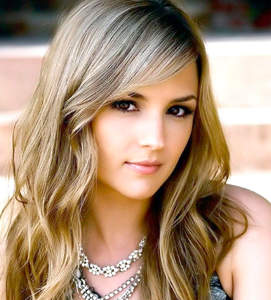

In [29]:
# Load some test images
test_images = tc.load_images('test/')
import PIL
from IPython.display import display, Image
for i,r in enumerate(list(test_images['image'])):
    image = PIL.Image.fromarray(r.pixel_data)
    image.thumbnail((300,300))
    print("Test image " + str(i) + ": ",test_images['path'][i])
    display(image)

In [30]:
# Stylize the test images
stylized_images = model.stylize(test_images)

Stylizing 1 image(s) using 5 style(s)
Stylizing 4/5
Stylizing 5/5


output/output_2018_08_29_132357/output_c0_s0_Yellow-Red-Blue.jpg


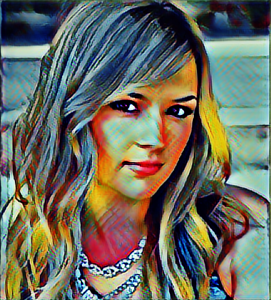

output/output_2018_08_29_132357/output_c0_s1_girls.jpg


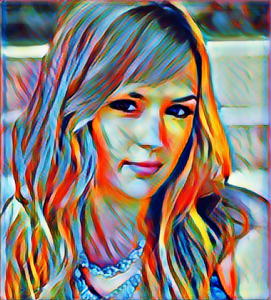

output/output_2018_08_29_132357/output_c0_s2_kandinsky.jpg


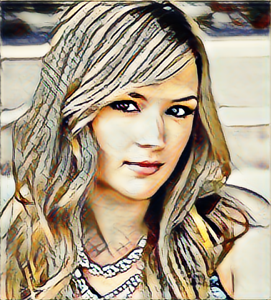

output/output_2018_08_29_132357/output_c0_s3_style20.jpg


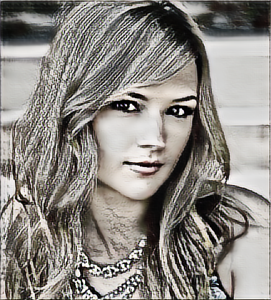

output/output_2018_08_29_132357/output_c0_s4_young.jpg


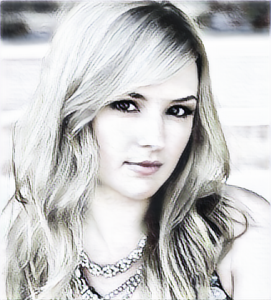

In [31]:
import PIL
from IPython.display import display, Image
for i,r in enumerate(list(stylized_images['stylized_image'])):
    r_name = save_folder + "/output_c"
    style_id = stylized_images['style'][i]
    style_name = styles['path'][style_id].split("/")[1].split(".")[0]
    r_name = r_name + str(stylized_images['row_id'][i]) + "_s" + str(style_id) + "_" + style_name  +".jpg"
    print(r_name)
    r.save(r_name)
    image = PIL.Image.fromarray(r.pixel_data)
    image.thumbnail((300,300))
    display(image)

Download the CoreML model:

In [0]:
from google.colab import files
files.download(save_folder + save_name + '.mlmodel')

The next step is the integration of the CoreML model with an iOS11 app. For this step, see the following examples:


*   [TuriCreate Style Transfer That Works](https://medium.com/datadriveninvestor/turicreate-style-transfer-that-works-13b9774c70b1)
*   [Creating a Prisma-like App with Core ML, Style Transfer and Turi Create](https://www.appcoda.com/coreml-turi-create/)

